# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

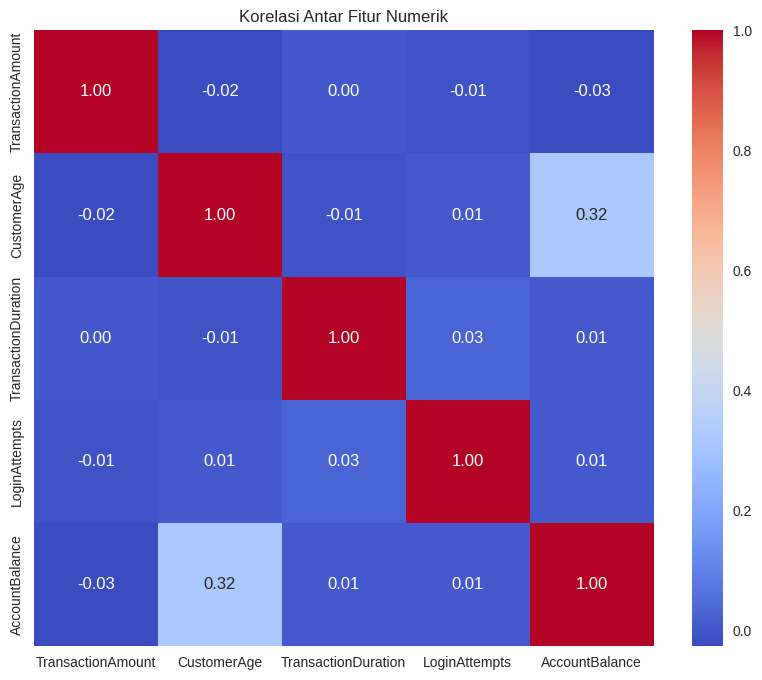

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Memastikan ada kolom numerik untuk dihitung korelasi
if numerical_df.shape[1] > 1:
    corr_matrix = numerical_df.corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Korelasi Antar Fitur Numerik')
    plt.show()
else:
    print("Tidak ada cukup kolom numerik untuk menampilkan korelasi.")

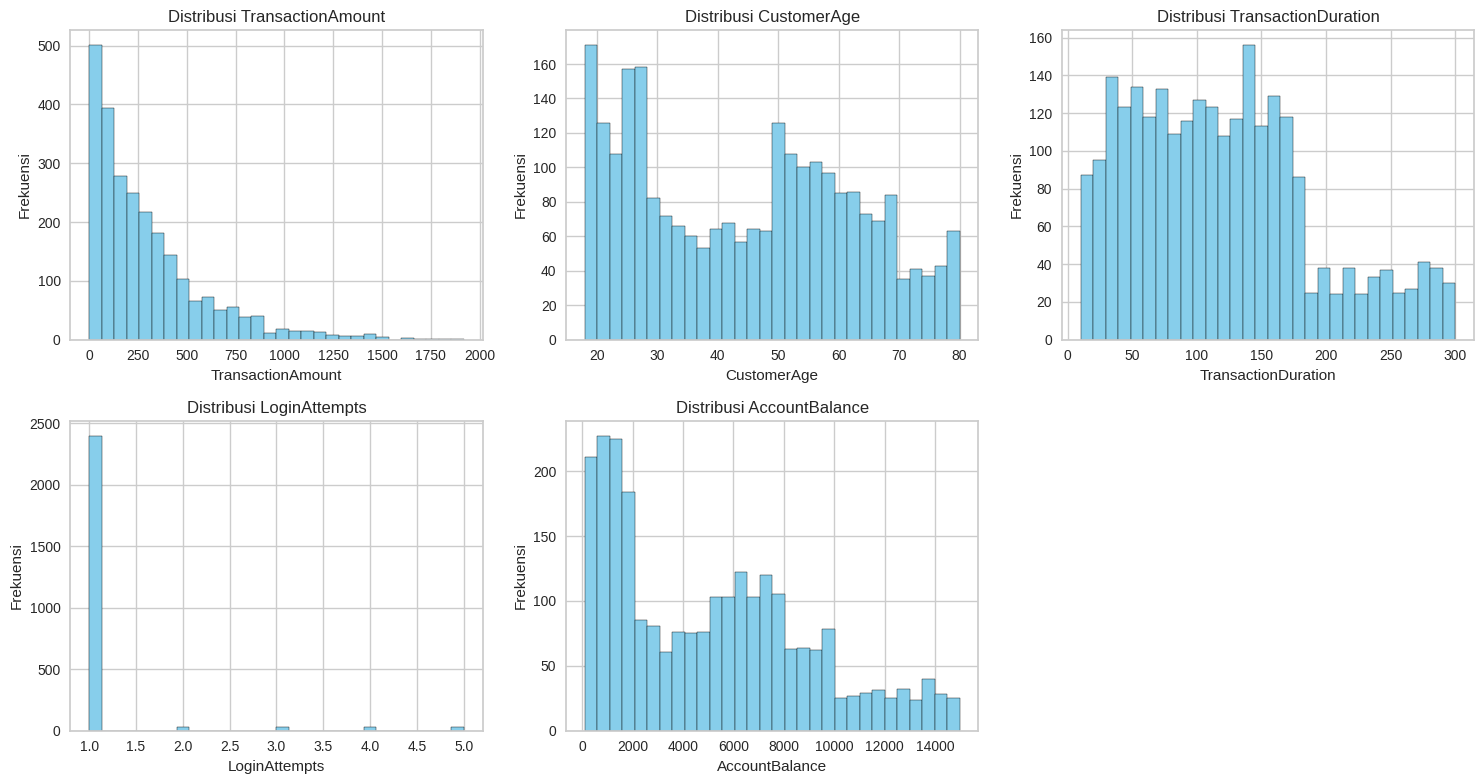

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Menentukan jumlah subplot berdasarkan jumlah kolom
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

# Membuat histogram untuk setiap kolom numerik
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

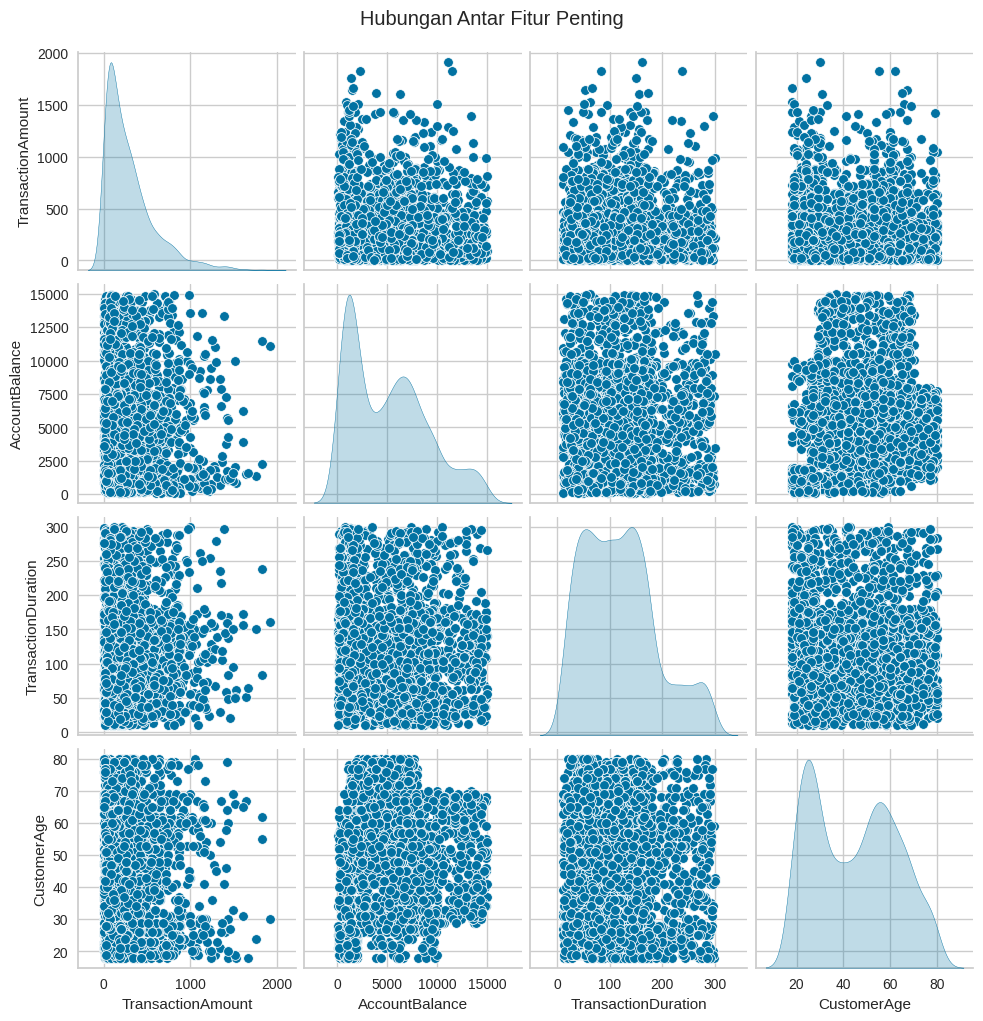

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

selected_cols = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'CustomerAge']
sns.pairplot(df[selected_cols], diag_kind='kde')
plt.suptitle('Hubungan Antar Fitur Penting', y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()

df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
# Mengecek dataset menggunakan duplicated().sum()

df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

cols_to_drop = [col for col in df.columns if 'id' in col.lower() or 'ip' in col.lower()]
df = df.drop(columns=cols_to_drop, errors='ignore')

df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

categorical_cols = df.select_dtypes(include=['object']).columns

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

df = df.fillna(df.median(numeric_only=True))
df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().

df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['TransactionAmount'] >= lower_bound) & (df['TransactionAmount'] <= upper_bound)]

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,0.132555,1249.758017,0.786756,21.279050,1.010829,0.430076,1.528113,0.377291,0.030508,0.338435,180.855060
std,0.112426,724.827548,0.439137,12.383373,0.828583,0.285457,1.150426,0.240561,0.148538,0.260681,103.671696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040993,625.000000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.095959,92.000000
50%,0.104010,1243.000000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.311416,181.000000
75%,0.193454,1880.000000,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.506899,271.000000
max,0.467223,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


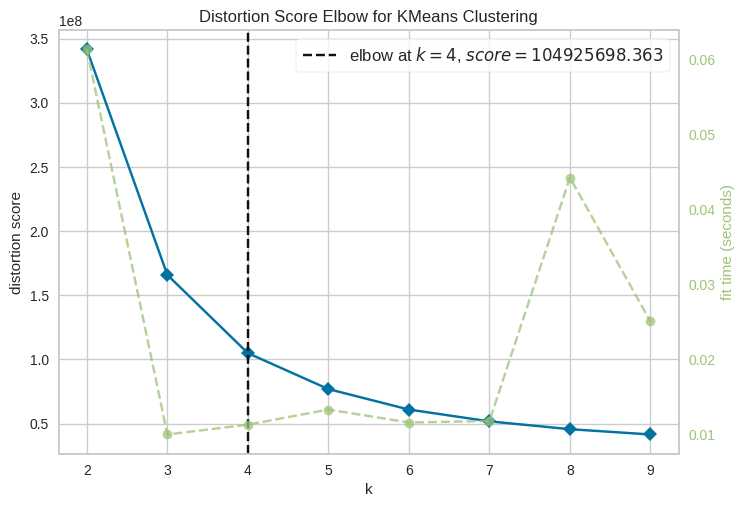

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering

model_kmeans = KMeans(n_clusters=4, random_state=42)
model_kmeans.fit(df.select_dtypes(include=['number']))

df['Cluster'] = model_kmeans.labels_

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,2
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,2
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16,3


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.

score = silhouette_score(df.select_dtypes(include=['number']), df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.4985468773833368


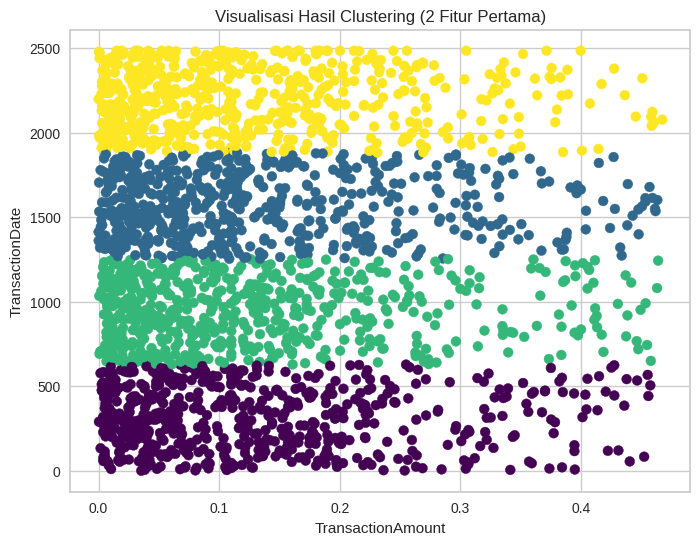

In [24]:
# Membuat visualisasi hasil clustering

plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("Visualisasi Hasil Clustering (2 Fitur Pertama)")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.select_dtypes(include=['number']))
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
data_final = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
model_pca = KMeans(n_clusters=4, random_state=42)
model_pca.fit(data_final)

KMeans(n_clusters=4, random_state=42)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA

joblib.dump(model_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

cluster_summary = df.groupby('Cluster').agg(['mean', 'min', 'max'])
pd.set_option('display.max_columns', None)
cluster_summary

TransactionAmount                     TransactionDate              \
                     mean       min       max            mean   min   max   
Cluster                                                                     
0                0.134006  0.000313  0.457331      313.925497     0   628   
1                0.136975  0.000031  0.463168     1565.302365  1253  1881   
2                0.131434  0.000599  0.463809      939.396040   629  1252   
3                0.127858  0.000000  0.467223     2195.534224  1882  2485   

        TransactionType           Location           Channel          \
                   mean min max       mean min max      mean min max   
Cluster                                                                
0              0.809603   0   2  21.514901   0  43  0.985099   0   3   
1              0.780405   0   2  21.067568   0  43  1.008446   0   3   
2              0.783828   0   2  21.226073   0  43  1.000000   0   3   
3              0.772955   0   2  21.303840   0  43  1.050083   0   3   

        CustomerAge           CustomerOccupation         TransactionDuration  \
               mean  min  max               mean min max                mean   
Cluster                                                                        
0          0.411584  0.0  1.0           1.483444   0   4            0.367121   
1          0.438781  0.0  1.0           1.572635   0   4            0.382182   
2          0.437081  0.0  1.0           1.541254   0   4            0.377666   
3          0.433034  0.0  1.0           1.515860   0   4            0.382333   

                       LoginAttempts           AccountBalance            \
         min       max          mean  min  max           mean       min   
Cluster                                                                   
0        0.0  0.996552      0.037252  0.0  1.0       0.340628  0.000064   
1        0.0  0.996552      0.023226  0.0  1.0       0.335210  0.000000   
2        0.0  0.993103      0.032178  0.0  1.0       0.333434  0.000377   
3        0.0  1.000000      0.029215  0.0  1.0       0.344473  0.001654   

                  PreviousTransactionDate           
              max                    mean min  max  
Cluster                                             
0        0.997633              187.658940   0  360  
1        0.997144              180.530405   0  360  
2        0.995087              174.561056   0  360  
3        1.000000              180.682805   0  360

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 0 – Nasabah dengan Aktivitas Transaksi Stabil dan Cenderung Konsisten**
- Rata-rata TransactionAmount sebesar 0.1340 dengan rentang 0.000313–0.457331 menunjukkan pola transaksi yang moderat.
- Aktivitas waktu (TransactionDate) berada di kisaran 0–628, menandakan bahwa transaksi mereka terjadi pada periode awal dataset dan relatif terbatas.
- TransactionType rata-rata 0.8096, dengan nilai maksimum 2, menunjukkan bahwa nasabah pada cluster ini melakukan beberapa jenis transaksi, namun tidak mendominasi satu tipe tertentu.
- Location memiliki rata-rata 21.51 (kisaran 0–43), menggambarkan bahwa transaksi tersebar di berbagai lokasi, tetapi tidak pada area ekstrem.
- Nilai Channel (mean 0.985) dengan kisaran 0–3 menandakan bahwa sebagian besar nasabah menggunakan lebih dari satu kanal transaksi, kemungkinan gabungan antara online dan ATM.
- CustomerAge memiliki rata-rata 0.4115 (setelah normalisasi), menandakan bahwa kelompok usia mereka berada pada rentang usia produktif menengah, sedangkan CustomerOccupation (mean 1.4834) menunjukkan distribusi pekerjaan yang cukup beragam namun tidak spesifik pada satu kategori.
- Nilai LoginAttempts rata-rata 0.0372, menunjukkan tingkat keberhasilan login yang sangat tinggi dan jarang mengalami kendala akses.
- AccountBalance berada dalam rentang 0.000064–0.997633 (mean 0.3406), artinya saldo mereka sangat bervariasi — dari hampir kosong hingga mendekati maksimum — namun dengan rerata moderat.
- Kesimpulan: Cluster 0 mencerminkan nasabah reguler yang bertransaksi rutin namun bernilai sedang, dengan pola perilaku yang konsisten dan stabil. Mereka cocok untuk program loyalitas jangka panjang atau peningkatan limit transaksi secara bertahap.

**Cluster 1 – Nasabah Aktif dengan Nilai Transaksi Lebih Tinggi dan Diversifikasi Kanal**
- Cluster ini memiliki TransactionAmount rata-rata 0.1369 dengan maksimum 0.463168, yang berarti mereka melakukan transaksi bernilai relatif besar dibanding cluster lain.
- TransactionDate berkisar 1253–1881, menunjukkan aktivitas di periode tengah dataset, yaitu fase di mana frekuensi transaksi sedang tinggi.
- Nilai Location mean 21.07, menunjukkan distribusi wilayah transaksi yang luas.
- Channel mean 1.0084 menunjukkan bahwa mereka memanfaatkan beragam kanal transaksi.
- CustomerAge rata-rata 0.4387 sedikit lebih tinggi dari cluster 0, yang mengindikasikan kelompok usia sedikit lebih matang, sedangkan CustomerOccupation mean 1.5726 menggambarkan dominasi pekerjaan yang mungkin terkait sektor profesional atau semi-profesional.
- LoginAttempts mean 0.0232 menjadi yang terendah di antara semua cluster, yang artinya mereka paling efisien dalam mengakses akun.
- Rata-rata AccountBalance sebesar 0.3352 dengan maksimum 0.997144 menunjukkan keseimbangan yang baik antara debit dan saldo akhir.
- Kesimpulan: Cluster ini menggambarkan nasabah aktif dengan nilai transaksi tinggi dan penggunaan kanal digital yang intensif. Mereka merupakan target ideal untuk layanan premium, reward points, atau kartu kredit dengan batas menengah ke atas.

**Cluster 2 – Nasabah Stabil dengan Aktivitas Moderat dan Keuangan Seimbang**
- Cluster 2 menampilkan TransactionAmount rata-rata 0.1314, dengan maksimum 0.463809, mirip dengan cluster 1 namun sedikit lebih rendah.
- TransactionDate berada di kisaran 629–1252, menunjukkan bahwa transaksi mereka terkonsentrasi di periode pertengahan awal dataset.
- Location mean 21.23, Channel 1.0000, dan CustomerAge 0.4370 menunjukkan bahwa perilaku transaksi mereka seragam dengan pola aktivitas yang tersebar merata di seluruh kanal dan lokasi. CustomerOccupation mean 1.5412 juga serupa dengan cluster 1, menandakan mereka mungkin berada pada segmen pekerjaan yang mirip tetapi dengan intensitas lebih rendah.
- Nilai LoginAttempts mean 0.0322 menunjukkan efisiensi login yang tinggi.
- Rata-rata AccountBalance 0.3334 dan maksimum 0.995087 memperlihatkan stabilitas finansial yang baik tanpa nilai ekstrem.
- Kesimpulan: Cluster ini merepresentasikan nasabah dengan pola transaksi moderat dan stabilitas keuangan yang kuat. Mereka cocok untuk program tabungan berjangka, investasi konservatif, atau produk asuransi.

**Cluster 3 – Nasabah Bernilai Besar dan Beraktivitas di Periode Akhir Dataset**
- Cluster 3 memiliki TransactionAmount rata-rata 0.1278, namun dengan maksimum tertinggi 0.467223, menandakan adanya transaksi bernilai sangat besar meskipun frekuensinya rendah.
- TransactionDate berada di kisaran 1882–2485, menandakan bahwa mereka aktif di periode paling akhir dataset, kemungkinan merupakan nasabah baru atau yang meningkat aktivitasnya di akhir periode observasi.
- Nilai Location 21.30 dan Channel 1.0500 menunjukkan mereka melakukan transaksi di banyak wilayah dan kanal. CustomerAge mean 0.4330 dan CustomerOccupation mean 1.5158 berada di tengah-tengah, memperlihatkan komposisi umur dan profesi yang berimbang.
- Yang paling menonjol, AccountBalance memiliki rata-rata tertinggi (0.3444) dan maksimum 1.000000, menandakan kelompok ini menyimpan saldo yang besar.
- LoginAttempts mean 0.0292 juga rendah, menunjukkan kenyamanan akses sistem.
- Kesimpulan: Cluster 3 menggambarkan nasabah bernilai besar yang aktif pada periode akhir dan memiliki saldo tinggi. Mereka sangat potensial untuk diarahkan ke layanan prioritas seperti wealth management, private banking, atau relationship banking.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [29]:
# Simpan Data

# Simpan Data ke file CSV
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal

df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,2
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,1
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,2
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16,3


In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)

for col in categorical_cols:
    encoder = encoders[col]
    df[col] = encoder.inverse_transform(df[col].astype(int))

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,3


In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

agg_numeric = df.groupby('Target')[numeric_cols].agg(['mean', 'min', 'max', 'std'])
agg_categorical = df.groupby('Target')[categorical_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

print("Analisis Deskriptif Numerik")
display(agg_numeric)
print("\n Mode untuk Fitur Kategorikal")
display(agg_categorical)

Analisis Deskriptif Numerik


TransactionAmount                           CustomerAge              \
                    mean   min     max         std        mean   min   max   
Target                                                                       
0             257.396589  0.86  877.81  216.911932   43.518212  18.0  80.0   
1             263.094814  0.32  889.01  220.004285   45.204392  18.0  80.0   
2             252.462277  1.41  890.24  217.138584   45.099010  18.0  80.0   
3             245.600267  0.26  896.79  208.882334   44.848080  18.0  80.0   

                  TransactionDuration                         LoginAttempts  \
              std                mean   min    max        std          mean   
Target                                                                        
0       17.414506          116.465232  10.0  299.0  69.718318      1.149007   
1       17.897635          120.832770  10.0  299.0  68.530335      1.092905   
2       17.968570          119.523102  10.0  298.0  69.549853      1.128713   
3       17.499984          120.876461  10.0  300.0  71.294960      1.116861   

                           AccountBalance                                 
        min  max       std           mean     min       max          std  
Target                                                                    
0       1.0  5.0  0.662411    5168.676871  102.20  14942.78  3879.806057  
1       1.0  5.0  0.526602    5088.076351  101.25  14935.50  3744.231217  
2       1.0  5.0  0.616522    5061.662805  106.86  14904.90  4001.754039  
3       1.0  5.0  0.560428    5225.878982  125.85  14977.99  3886.739397


 Mode untuk Fitur Kategorikal


,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate
Target,,,,,,
0,2023-01-02 16:00:06,Debit,Boston,Branch,Doctor,2024-11-04 08:10:23
1,2023-07-10 16:43:05,Debit,Houston,ATM,Student,2024-11-04 08:12:18
2,2023-04-03 16:35:29,Debit,Indianapolis,ATM,Doctor,2024-11-04 08:07:18
3,2023-12-28 17:31:03,Debit,Fort Worth,Branch,Engineer,2024-11-04 08:07:38


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (High-Value Branch Professionals)**
- Rata-rata transaksi sebesar 257.39, usia rata-rata 43.5 tahun, dan saldo akun sekitar Rp5.168,676. Lokasi dominan Boston, kanal transaksi Branch, dan pekerjaan Doctor.
- Analisis: Pelanggan dengan profil profesional menengah ke atas yang masih mengandalkan layanan cabang. Nilai transaksi cukup tinggi dengan durasi transaksi yang panjang (±116 detik), menandakan preferensi pada konsultasi langsung atau layanan manual. Produk seperti premium account service dan health professional finance program sesuai untuk mereka.

2. **Cluster 1: (Young Active ATM Users)**
- Rata-rata transaksi 263.09, usia 45.2 tahun, dan saldo Rp5.088,076. Kanal utama ATM, lokasi Houston, profesi Student.
- Analisis: Meskipun terdapat ketidaksesuaian antara usia rata-rata dan profesi (kemungkinan karena data representatif, bukan aktual), cluster ini menunjukkan nasabah yang aktif, sering menggunakan ATM untuk transaksi bernilai sedang. Mereka lebih mobile, efisien, dan berpotensi tertarik pada layanan digital banking dan reward berbasis aktivitas transaksi.

3. **Cluster 2: (Mid-Level Professionals, Digital ATM Users)**
- Nilai transaksi rata-rata 252.46, usia 45.09 tahun, saldo Rp5.061,662. Dominan Doctor, kanal ATM, lokasi Indianapolis.
- Analisis: Mirip dengan Cluster 0 dari segi profil profesional, namun lebih memilih kanal digital. Mereka nyaman bertransaksi secara mandiri dan memiliki tingkat kestabilan finansial yang kuat. Program pengembangan yang cocok adalah layanan hybrid finance atau tele-advisory investment berbasis teknologi.

4. **Cluster 3: (Tech-Savvy Engineers, Balanced Branch Users)**
- Rata-rata transaksi 245.60, usia 44.85 tahun, saldo Rp5.225,878. Kanal Branch, lokasi Fort Worth, profesi Engineer.
- Analisis: Kelompok ini memiliki saldo tertinggi namun nilai transaksi lebih kecil, menunjukkan perilaku menabung lebih dominan daripada konsumsi. Mereka berhati-hati dan rasional dalam pengelolaan finansial. Layanan rekomendasi meliputi low-risk investment, secured savings plan, atau program loyalitas berbasis kestabilan saldo.

### (Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.